<a href="https://colab.research.google.com/github/JesseJames50/Analise-Dados-Financeiros/blob/main/previsao_demanda_energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

# Gerar dados simulados
np.random.seed(0)
data = pd.date_range(start='2024-01-01', end='2024-05-10', freq='D')
temperature = np.random.normal(loc=20, scale=5, size=(len(data),))
weekday = data.dayofweek
energy_consumption = temperature * 4 + weekday * 10 + np.random.normal(scale=10, size=(len(data),))

# Criar DataFrame
df = pd.DataFrame({
    'Date': data,
    'Temperature': temperature,
    'Weekday': weekday,
    'EnergyConsumption': energy_consumption
})


In [24]:
temperature

array([28.82026173, 22.00078604, 24.89368992, 31.204466  , 29.33778995,
       15.1136106 , 24.75044209, 19.24321396, 19.48390574, 22.05299251,
       20.72021786, 27.27136753, 23.80518863, 20.60837508, 22.21931616,
       21.66837164, 27.47039537, 18.97420868, 21.56533851, 15.7295213 ,
        7.23505092, 23.26809298, 24.32218099, 16.2891749 , 31.34877312,
       12.72817163, 20.22879259, 19.06408075, 27.66389607, 27.34679385,
       20.77473713, 21.8908126 , 15.56107126, 10.09601766, 18.26043925,
       20.78174485, 26.1514534 , 26.01189924, 18.06336591, 18.48848625,
       14.75723517, 12.89991031, 11.46864905, 29.75387698, 17.45173909,
       17.80962849, 13.7360232 , 23.88745178, 11.93051076, 18.9362986 ,
       15.52266719, 21.93451249, 17.44597431, 14.09683908, 19.85908886,
       22.14165935, 20.33258611, 21.51235949, 16.82838953, 18.18629417,
       16.63769776, 18.20223419, 15.93426859, 11.36858699, 20.88713071,
       17.99109532, 11.84900827, 22.31391128, 15.46350818, 20.25

In [25]:
# Utilizando o  MLPRegressor
# Preparação dos Dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalizar os dados
scaler = MinMaxScaler()
features = ['Temperature', 'Weekday']
target = ['EnergyConsumption']

df_scaled = scaler.fit_transform(df[features + target])
X = df_scaled[:, :-1]
y = df_scaled[:, -1]

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Construir e Treinar o Modelo
from sklearn.neural_network import MLPRegressor

# Construir o modelo
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=500)
mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
             max_iter=500)

In [34]:
# Avaliação do Modelo
from sklearn.metrics import mean_squared_error

# Prever dados de teste
y_pred = mlp.predict(X_test)

# Calcular MSE - mais próximo de "zero" mellhor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.0045283039804422795


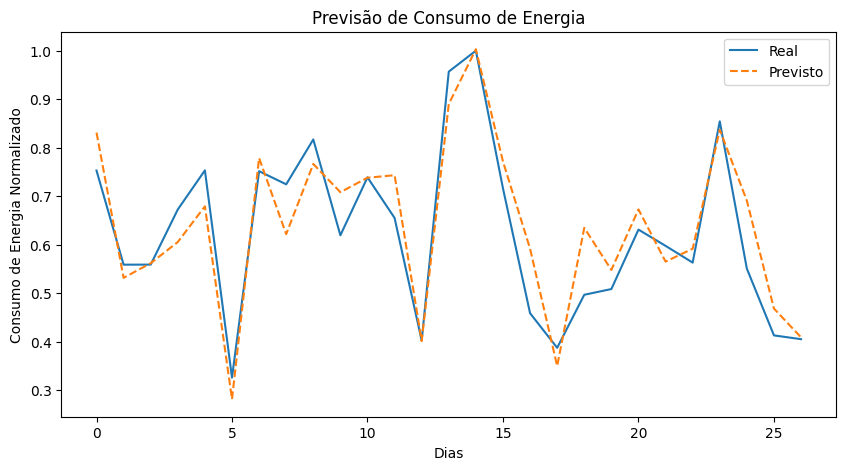

In [35]:
# Visualização das Previsões
import matplotlib.pyplot as plt

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Previsto', linestyle='--')
plt.title('Previsão de Consumo de Energia')
plt.xlabel('Dias')
plt.ylabel('Consumo de Energia Normalizado')
plt.legend()
plt.show()

In [29]:
# Ajuste Fino com Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,50), (100,50), (100,100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPRegressor(max_iter=500), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Melhores parâmetros:", grid.best_params_)


Melhores parâmetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
